# <div class="alert alert-info" role="alert"> <center> Etude du mouvement d'une patineuse

Pour faire fonctionner le programme , il faut exécuter toutes les cellules contenant du code dans l'ordre.

On commence par importer les bibliothèques nécéssaires :
+ matplotlib permet de tracer les graphiques
+ csv permet de lire et d'importer les données du pointage stockées dans un fichier.csv

In [6]:
%matplotlib inline
from matplotlib.pyplot import*
from numpy import*
import csv

On crée deux listes vides permettant de récupérer les corrdonnées x et y du point M au cours du mouvement. Elles sont remplies avec les données du fichier pointage.csv créé grace au pointage.

In [7]:
x=[]
y=[]
with open('pointage.csv','r') as fichier: 
    fichier.readline()
    for ligne in fichier:
        ligne_lue=ligne.split(';')
        x.append(float(ligne_lue[1].replace(',','.'))) 
        y.append(float(ligne_lue[2].replace(',','.')))

<div class="alert alert-success" role="alert">
<center><b>1ère étape : Tracé du graphique
    
&nbsp;
1- on donne l'intervalle de temps entre deux points ici 40 ms

&nbsp;
2- plot(x,y,'ro',ms=20.): tracé du graphique y en fonction de x. on précise le type et la taille du marqueur

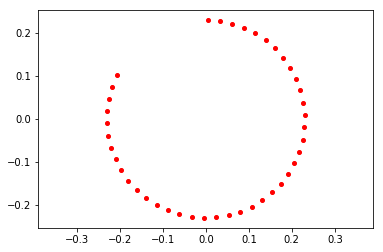

In [8]:
dt =0.040 # en seconde
plot(x,y,'ro',ms=4.) 
axis('equal') #permet d'avoir la même échelle en abscisse et en ordonnée
rcParams['figure.figsize'] = [8,8] # permet de changer l'échelle du grphique 

<div class="alert alert-success" role="alert"><center><b>2ème étape : Tracé du vecteur vitesse
    
&nbsp;
<center><b>Création de la fonction "vecteur_vitesse" permettant de tracer un vecteur vitesse au point Mi et de calculer sa norme

Consulter [l'aide Python](https://www.pearltrees.com/private/id37997892/item339310930?paccess=17ded226367.14397952.8fe009816771147d18cc0c94c7bb481a)pour comprendre comment a été construit le vecteur vitesse.

A la position 3  la vitesse est de 0.72 m/s


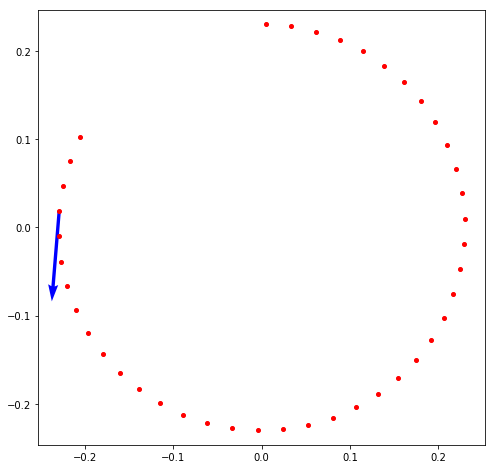

In [9]:
def vecteur_vitesse(x, y, dt, i) :
    vx = (x[i+1] - x[i-1]) / (2*dt) # coordonnée Vx du vecteur vitesse au point Mi
    vy = (y[i+1] - y[i-1]) / (2*dt) # coordonnée Vy du vecteur vitesse au point Mi
    quiver(x[i], y[i], vx, vy, scale_units='xy',angles='xy',color='blue',scale=7)   
    vitesse = sqrt(((x[i+1]-x[i])/(dt))**2 +((y[i+1]-y[i])/(dt))**2) # Calcul de la vitesse au point i
    print("A la position",i, " la vitesse est de",round(vitesse,2), "m/s")

plot(x,y,'ro',ms=4.) 
axis('equal')
rcParams['figure.figsize'] = [8,8]

vecteur_vitesse(x, y, dt,3) #tracé du vecteur vitesse au point M3

<div class="alert alert-success" role="alert"><center><b>3ème étape : Tracé du vecteur variation de vitesse
<center><b>Création de la fonction "deltav" permettant de tracer un vecteur variation de vitesse au point Mi et de calculer sa norme

Attention, pour visualiser plus facilement le vecteur variation de vitesse, il a une échelle différente de celle des vecteurs vitesses.

&nbsp;
Ligne 12, il faut mettre scale =7 pour obtenir la même échelle de représentation.

A la position 3  la vitesse est de 0.72 m/s
A la position 5  la vitesse est de 0.72 m/s
A la position 4  la variation de la vitesse est de 0.181 m/s


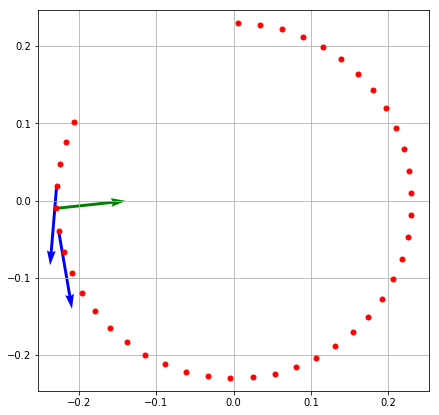

In [11]:
# Création des listes vx et vy(coordonnées du vecteur vitesse)
vx=[]
vy=[]
for n in range(len(x)-1):
    vx.append((x[n+1]-x[n])/dt)
    vy.append((y[n+1]-y[n])/dt)

# Création de la fonction deltav (variation de la vitesse)    
def deltav(vx,vy,dt,i) :
    dvx = (vx[i+1] - vx[i-1]) 
    dvy = (vy[i+1] - vy[i-1])  
    quiver(x[i], y[i], dvx, dvy, scale_units='xy',angles='xy',color='green',scale=2)  
    deltavitesse = sqrt(((vx[i+1]-vx[i-1]))**2 +((vy[i+1]-vy[i-1]))**2) # Calcul de la variation de vitesse au point i
    print("A la position",i, " la variation de la vitesse est de",round(deltavitesse,3), "m/s")

plot(x,y,'ro',ms=5.) 
axis('equal')
grid(True) # Affichage de la grille
rcParams['figure.figsize'] = [7,7]

vecteur_vitesse(x, y, dt,3) #tracé du vecteur vitesse au point M3
vecteur_vitesse(x, y, dt,5) #tracé du vecteur vitesse au point M5

deltav(vx,vy,dt,4) #tracé du vecteur variation de vitesse au point M4